In [1]:
# Importing the required file for incremental ELM
import numpy as np

In [2]:
# To find out root mean square error of the dataset
def r_mean_squared_error(y_actual, y_pred):
  return np.sqrt((np.mean((y_actual - y_pred) ** 2)))

In [3]:
# To calculate the accuracy of the dataset.
def accuracy_matrix(y_actual, y_pred):
  y_actual = np.argmax(y_actual, axis=-1)
  y_pred = np.argmax(y_pred, axis=-1)
  sum = np.sum(y_actual == y_pred)
  accuracy = sum/len(y_actual)
  return accuracy

In [4]:
# The main incremental ELM class
class Incremental_ELM:
    def __init__(self, input_nodes, hidden_layer, output_nodes,):
      self.input_nodes = input_nodes
      self.hidden_layer = hidden_layer
      self.output_nodes = output_nodes
      self.bias = np.zeros(shape=(self.hidden_layer,))
      self.weights = np.random.uniform(-1,1,(self.input_nodes,self.hidden_layer))
      self.beta = np.random.uniform(-1,1,(hidden_layer,output_nodes))

    # The sigmoid activation function
    def sigmoid_activation(self, X_input):
      return 1. / (1. + np.exp(-X_input))

    # The prediction function
    def prediction(self, value):
          y_value = self.sigmoid_activation(value.dot(self.weights)+self.bias)
          return list(y_value.dot(self.beta))
          
    # The training function
    def fit(self, X_input, max_hd, Y_output):
      self.weights = np.random.uniform(-1,1,(self.input_nodes,1))
      self.beta = np.random.uniform(-1,1,(1,self.output_nodes))

      hidden_layer_M = self.sigmoid_activation(X_input.dot(self.weights))
      hidden_layer_M_inv = np.linalg.pinv(hidden_layer_M)
      self.beta = hidden_layer_M_inv.dot(Y_output)

      for i in range(1, max_hd):
        h_w = np.random.uniform(-1,1,(self.input_nodes,1))
        h_b = np.random.uniform(-1,1,(1, self.output_nodes))
        self.weights = np.hstack([self.weights,h_w])
        self.beta = np.vstack([self.beta,h_b])

        hidden_layer_M = self.sigmoid_activation(X_input.dot(self.weights))
        hidden_layer_M_inv = np.linalg.pinv(hidden_layer_M)
        self.beta = hidden_layer_M_inv.dot(Y_output)


      print('Bias shape:', self.bias.shape)
      print('Weights shape:', self.weights.shape)
      print('Beta shape:', self.beta.shape)


In [5]:
# Loading the dataset and importing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [6]:
# Defining the attributes
n_class = 10
max_hidden_node = 1000
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# Data pre-processing and categorising the values.
X_train = X_train.astype(np.float32) / 255
X_train = X_train.reshape(-1, 28**2)
y_train = to_categorical(y_train, n_class).astype(np.float32)
X_test = X_test.astype(np.float32) / 255
X_test = X_test.reshape(-1, 28**2)
y_test = to_categorical(y_test, n_class).astype(np.float32)

In [8]:
# creating a ELM class object model
model = Incremental_ELM(input_nodes=28**2,hidden_layer=max_hidden_node,output_nodes=n_class)

In [9]:
# Training and calulating the accuracy.
initial_train_record = time.time()
model.fit(X_train, max_hidden_node, y_train)
final_train_record = time.time()
train_pred = model.prediction(X_train)
train_accuracy = accuracy_matrix(y_train, train_pred)
error_train = r_mean_squared_error(y_train, train_pred)

Bias shape: (1000,)
Weights shape: (784, 1000)
Beta shape: (1000, 10)


In [10]:
print(f"<-----------Training Accuracy, Error and Time----------->\n")
print(f"The Training Accuracy of MNIST Dataset: {train_accuracy*100}")
print(f"Root mean squared Error of MNIST Train Dataset : {error_train}")
print(f"Train Time of MNIST Dataset : {final_train_record-initial_train_record} seconds")

<-----------Training Accuracy, Error and Time----------->

The Training Accuracy of MNIST Dataset: 93.81166666666667
Root mean squared Error of MNIST Train Dataset : 0.15199051363452268
Train Time of MNIST Dataset : 11137.719383001328 seconds


In [11]:
initial_test_record = time.time()
test_pred = model.prediction(X_test)
final_test_record = time.time()
test_accuracy = accuracy_matrix(y_test,test_pred)
error_test = r_mean_squared_error(y_test,test_pred)

print(f"<-----------Testing Accuracy, Error and Time----------->\n")
print(f"The Testing Accuracy of MNIST Classification Dataset: {test_accuracy*100}")
print(f"Root mean squared Error of MNIST Test Classification Dataset : {error_test}")
print(f"Test Time of MNIST Classification Dataset : {final_test_record-initial_test_record} seconds")

<-----------Testing Accuracy, Error and Time----------->

The Testing Accuracy of MNIST Classification Dataset: 93.76
Root mean squared Error of MNIST Test Classification Dataset : 0.15304053459736197
Test Time of MNIST Classification Dataset : 0.8296647071838379 seconds


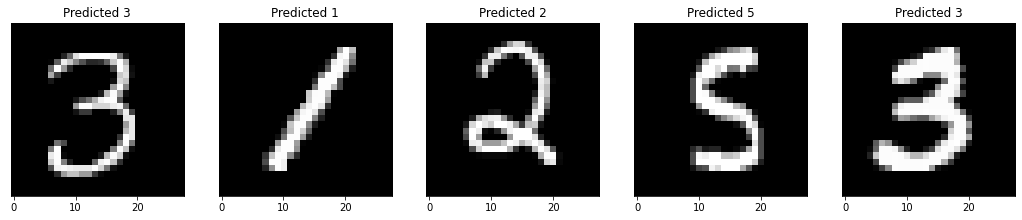

In [12]:
# Plotting the predicted value on particular image.
test_data = X_test[np.random.choice(len(X_test), size=5, replace=False)]
predictions = model.prediction(test_data)

fig, data = plt.subplots(1, 5)
fig.set_size_inches(18, 10)
for index, image in enumerate(test_data):
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    data[index].imshow(pixels, cmap='gray')
    data[index].axes.get_yaxis().set_visible(False)
    data[index].title.set_text(f'Predicted {np.argmax(predictions[index])}')
    
    
plt.show()
